<a href="https://colab.research.google.com/github/vaishnavi177/Stockport-Predictive-Sentiment-Analysis/blob/main/tiepro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv('stock_market_crash_2022.csv',encoding="ISO-8859-1")
df.head()

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,ChintanRajput16,"['stockmarketcrash', 'StocksToBuy', 'stockstow...",2022-06-19 22:57:27+00:00,54,0,2,2,0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,DrPCJustice,"['Bidenomics', 'inflation', 'recession', 'stoc...",2022-06-19 22:45:55+00:00,28,0,0,0,0,en,NaN,NaN,NaN,1.538653e+18,https://twitter.com/rdrhwke,"[User(username='rdrhwke', id=43753976, display..."


In [ ]:
df1=df.drop(['media','inReplyToUser','replycount','retweetcount','hashtags','retweetedTweet','quotedtweet','username','quotecount','language','likecount','inReplyToTweetId','inReplyToUser','mentionedUsers','user followers count'],axis='columns')
df1.head()


,id,text,text_sentiment,created_at
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,2022-06-19 23:34:29+00:00
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,2022-06-19 23:28:20+00:00
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,2022-06-19 23:11:52+00:00
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,2022-06-19 22:57:27+00:00
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,2022-06-19 22:45:55+00:00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33946 entries, 0 to 33945
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              33946 non-null  int64 
 1   text            33946 non-null  object
 2   text_sentiment  33946 non-null  object
 3   created_at      33946 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
def remove_pattren(input_txt,pattren):
  r = re.findall(pattren,input_txt)
  for word in r:
    input_txt=re.sub(word,"",input_txt)
  return input_txt

In [ ]:
df1['clean_txt']=np.vectorize(remove_pattren)(df1['text'],"@")
df1.head()


,id,text,text_sentiment,created_at,clean_txt
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,2022-06-19 23:34:29+00:00,When will the #NYSE #stockmarketcrash happen?
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,2022-06-19 23:28:20+00:00,Aaj ka gyan:\n\nIf a company isn't a quality c...
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,2022-06-19 23:11:52+00:00,The stock market needs to crash hard to make i...
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,2022-06-19 22:57:27+00:00,"Those who are ""Buying on DIP"" will very soon b..."
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,2022-06-19 22:45:55+00:00,rdrhwke I wish our so-called President were tr...


In [ ]:
df1['clean_txt']=df1['clean_txt'].str.replace("[^a-zA-Z#]"," ")
df1.head()

,id,text,text_sentiment,created_at,clean_txt
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,2022-06-19 23:34:29+00:00,When will #NYSE #stockmarketcrash happen
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,2022-06-19 23:28:20+00:00,gyan company quality company just because pric...
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,2022-06-19 23:11:52+00:00,stock market needs crash hard make realistic j...
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,2022-06-19 22:57:27+00:00,Those Buying will very soon become Promoters c...
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,2022-06-19 22:45:55+00:00,rdrhwke wish called President were transitory ...


In [ ]:
 df1['clean_txt']=df1['clean_txt'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df1.head()

,id,text,text_sentiment,created_at,clean_txt
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,2022-06-19 23:34:29+00:00,When will #NYSE #stockmarketcrash happen
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,2022-06-19 23:28:20+00:00,gyan company quality company just because pric...
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,2022-06-19 23:11:52+00:00,stock market needs crash hard make realistic j...
3,1538657239849836544,"Those who are ""Buying on DIP"" will very soon b...",Neutral,2022-06-19 22:57:27+00:00,Those Buying will very soon become Promoters c...
4,1538654339044196358,@rdrhwke I wish our so-called President were t...,Positive,2022-06-19 22:45:55+00:00,rdrhwke wish called President were transitory ...


In [ ]:
##!pip install wordcloud

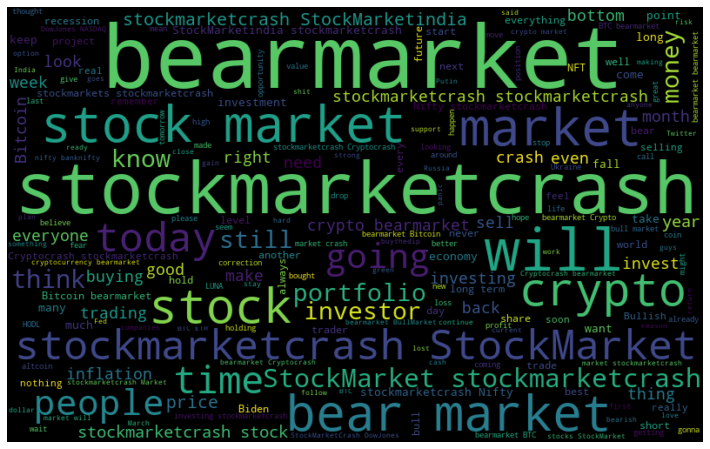

In [ ]:
all_words=" ".join([x for x in df1['clean_txt']])

from wordcloud import WordCloud
wordcount = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcount, interpolation='bilinear')
plt.axis('off')
plt.show()

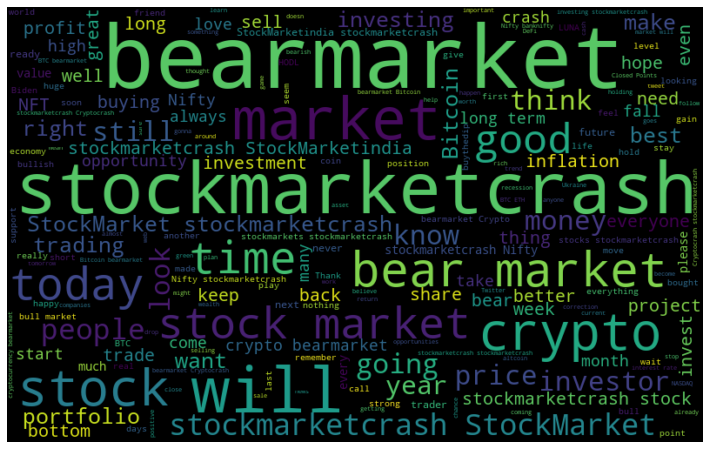

In [ ]:
all_words=" ".join([x for x in df1['clean_txt'][df1['text_sentiment']=='Positive']])

from wordcloud import WordCloud
wordcount = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcount, interpolation='bilinear')
plt.axis('off')
plt.show()

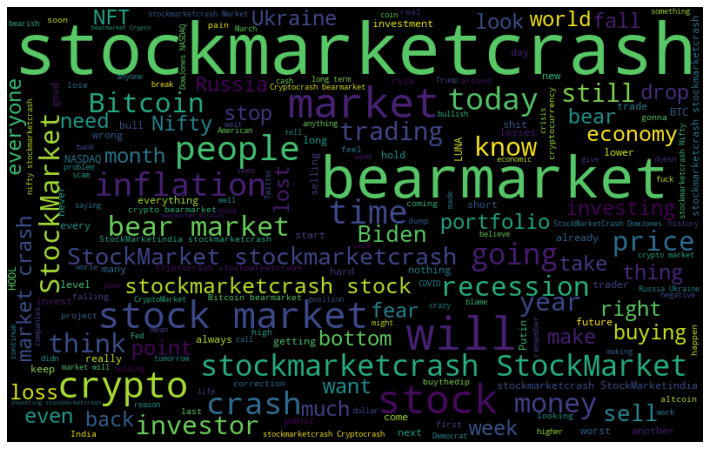

In [ ]:
all_words=" ".join([x for x in df1['clean_txt'][df1['text_sentiment']=='Negative']])

from wordcloud import WordCloud
wordcount = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcount, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def hashtags_extract(tweet):
  hashtags=[]
  for word in tweet:
    ht=re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags 

In [ ]:
ht_postive=hashtags_extract(df1['clean_txt'][df1['text_sentiment']==0])

ht_negative=hashtags_extract(df1['clean_txt'][df1['text_sentiment']==1])

In [ ]:
ht_postive[:5]

[]

In [ ]:
ht_negative[:5]

[]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_venctorized=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow =bow_venctorized.fit_transform(df1['clean_txt'])

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(bow,df1['text_sentiment'],random_state=42, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)
accuracy_score(y_test,pred)*100

73.18251443384